In [3]:
import os
os.chdir("../scripts")

In [4]:
from collections import defaultdict
import gymnasium as gym
import numpy as np
from agents.q_agents import BlackJackAgent
from utils.plot import plot_smooth_curve

from pyvirtualdisplay import Display
from tqdm.notebook import tqdm

In [5]:
learning_rate = 0.01                                                       # How fast to update q-values
initial_epsilon = 1.0                                                      # Initial rate for exploration
final_epsilon = 0.1                                                        # Final rate for exploration
num_episodes = 100_000                                                     # Total number of hands to practice
epsilon_decay = abs(initial_epsilon - final_epsilon) / (num_episodes * .5) # Reduction of exploration over time

In [9]:
with Display() as disp:
    train_env = gym.make("Blackjack-v1", sab=False)
    train_env = gym.wrappers.RecordEpisodeStatistics(train_env, buffer_length=num_episodes)

    agent = BlackJackAgent(
        train_env,
        learning_rate,
        initial_epsilon,
        final_epsilon,
        epsilon_decay
    )

    # Training loop
    for _ in tqdm(range(num_episodes)):
        obs, info = train_env.reset()
        _done = False

        while not _done:
            # Choose action
            action = agent.get_action(obs)

            # Take action
            next_obs, reward, terminated, truncated, info = train_env.step(action)

            # Update q_values
            agent.update(obs, action, reward, terminated, next_obs)

            # Step into new state
            obs = next_obs
            _done = terminated or truncated
        
        # Decay epsilon for each episode
        agent.decay_epsilon()

  0%|          | 0/100000 [00:00<?, ?it/s]

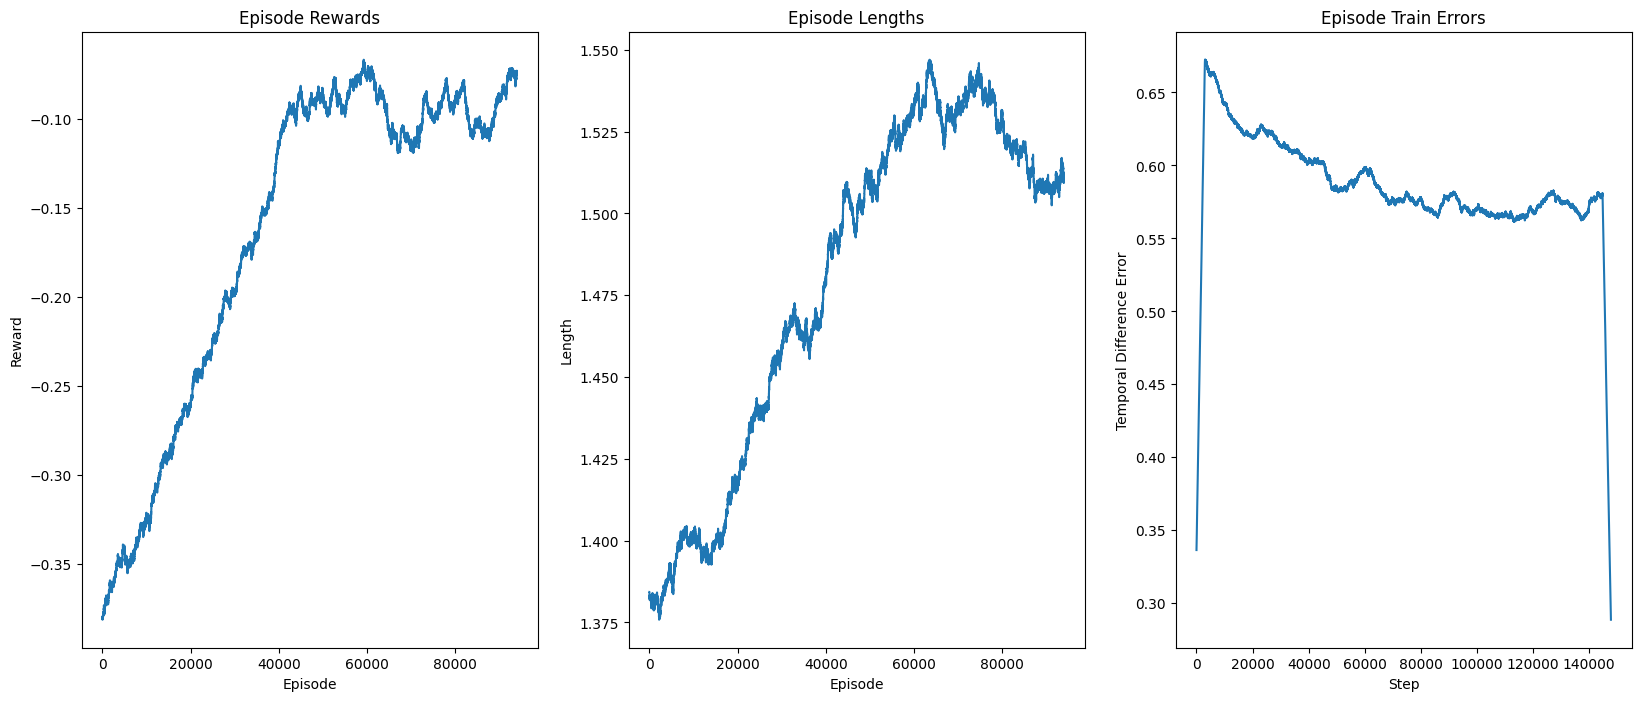

In [10]:
plot_smooth_curve(agent, train_env, 6000)